# Step 1: Load the Dataset

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

In [45]:
# Data
from ucimlrepo import fetch_ucirepo

forest_fires = fetch_ucirepo(id=162)
X = forest_fires.data.features
y = forest_fires.data.targets

# Display dataset structure
print(X.info())
print(X.describe())
print(y.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 48.6+ KB
None
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192 

# Step 2: Exploratory Data Analysis (EDA)

In [16]:
# FFMC: Fine Fuel Moisture Code - fuel moisture of forest litter fuels under the shade of a forest canopy
# DMC: Duff Moisture Code - fuel moisture of decomposed organic material underneath the litter
# DC: Drought Code - drying deep into the soil. Max value is 1000.
# ISI: Initial Spread Index
X.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [41]:
data = X.copy()
data['Area'] = y['area']
data.shape

(517, 13)

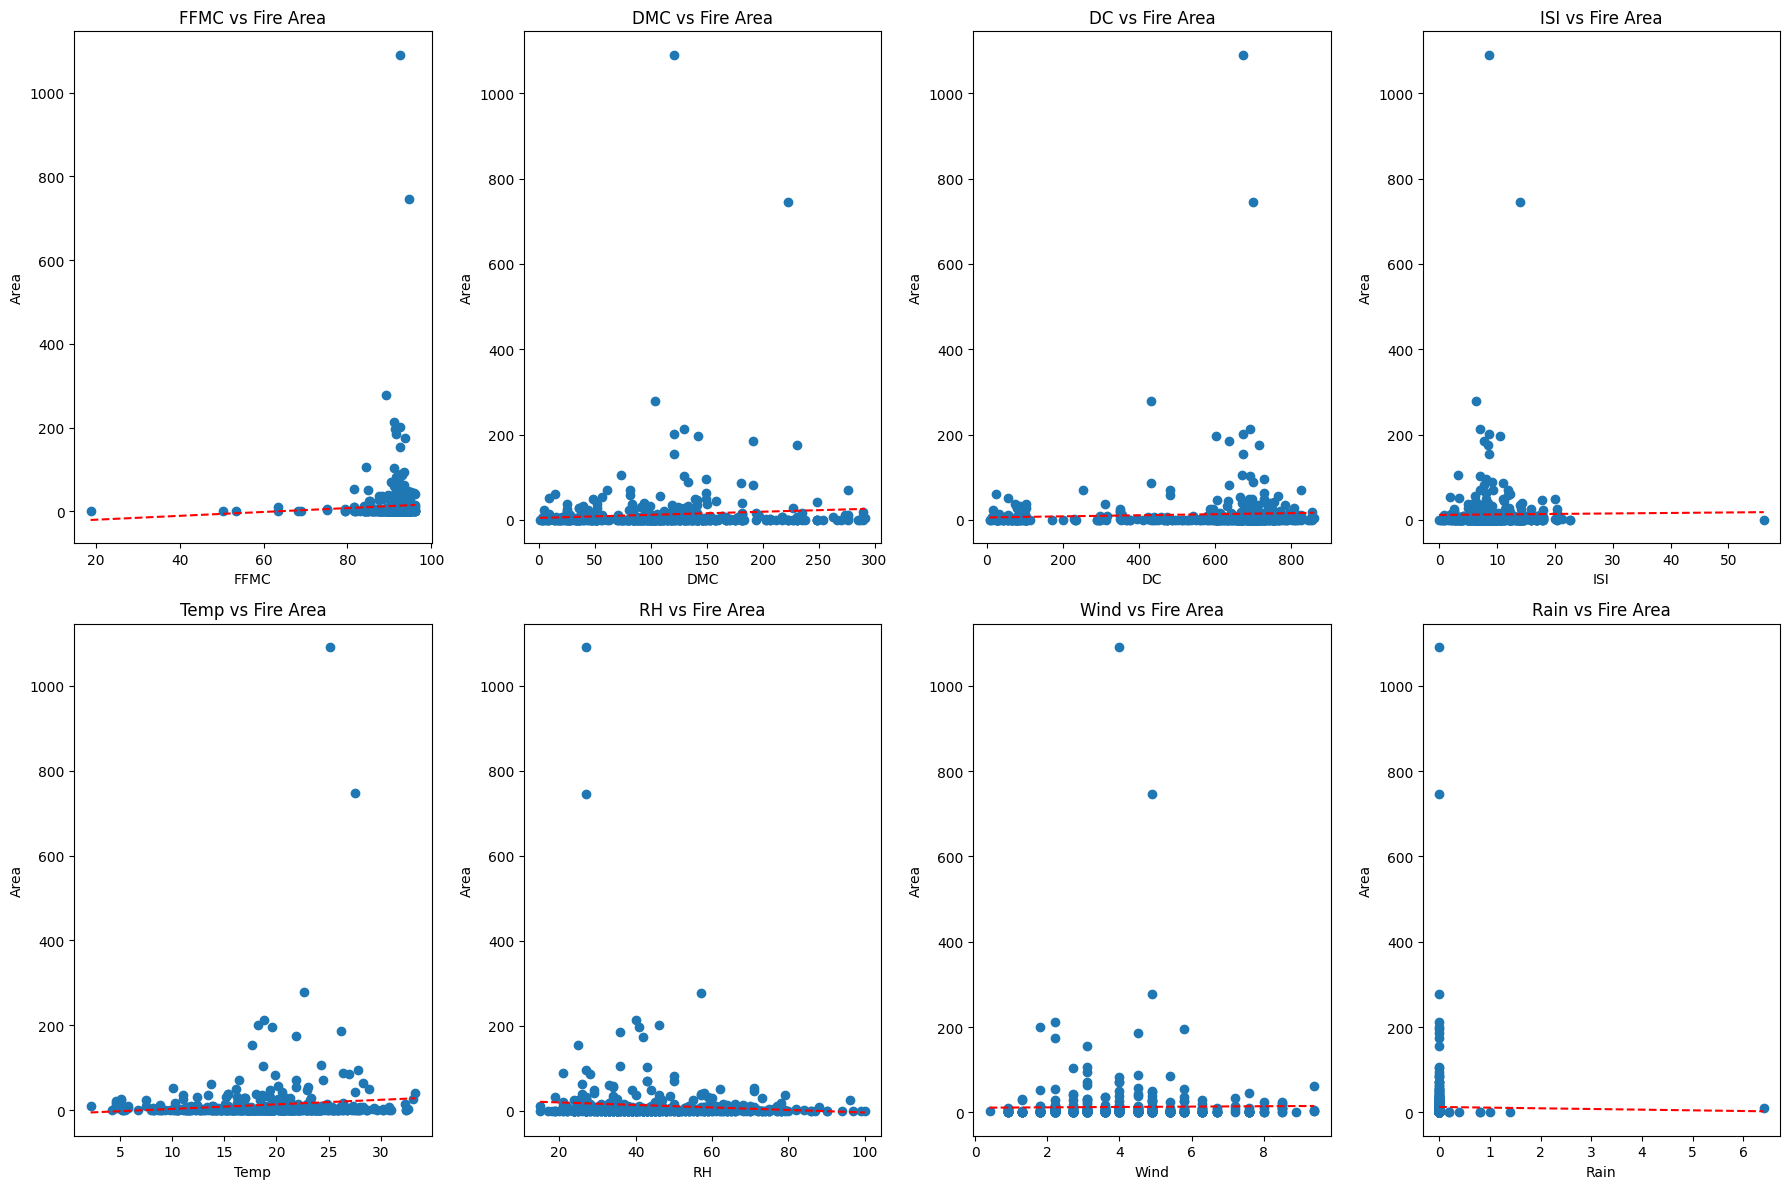

In [33]:
def plot_linear_regression(ax, x, y):
    m, b = np.polyfit(x, y, 1)
    x_vals = np.linspace(min(x), max(x), 100)
    ax.plot(x_vals, m * x_vals + b, color="red", linestyle="--")

# Create 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(18, 12))

plt1_x = X['FFMC']
axes[0, 0].scatter(plt1_x, y)
axes[0, 0].set_xlabel('FFMC')
axes[0, 0].set_ylabel('Area')
axes[0, 0].set_title('FFMC vs Fire Area')
plot_linear_regression(axes[0, 0], plt1_x, y)

plt2_x = X['DMC']
axes[0, 1].scatter(plt2_x, y)
axes[0, 1].set_xlabel('DMC')
axes[0, 1].set_ylabel('Area')
axes[0, 1].set_title('DMC vs Fire Area')
plot_linear_regression(axes[0, 1], plt2_x, y)

plt3_x = X['DC']
axes[0, 2].scatter(plt3_x, y)
axes[0, 2].set_xlabel('DC')
axes[0, 2].set_ylabel('Area')
axes[0, 2].set_title('DC vs Fire Area')
plot_linear_regression(axes[0, 2], plt3_x, y)

plt4_x = X['ISI']
axes[0, 3].scatter(plt4_x, y)
axes[0, 3].set_xlabel('ISI')
axes[0, 3].set_ylabel('Area')
axes[0, 3].set_title('ISI vs Fire Area')
plot_linear_regression(axes[0, 3], plt4_x, y)

plt5_x = X['temp']
axes[1, 0].scatter(plt5_x, y)
axes[1, 0].set_xlabel('Temp')
axes[1, 0].set_ylabel('Area')
axes[1, 0].set_title('Temp vs Fire Area')
plot_linear_regression(axes[1, 0], plt5_x, y)

plt6_x = X['RH']
axes[1, 1].scatter(plt6_x, y)
axes[1, 1].set_xlabel('RH')
axes[1, 1].set_ylabel('Area')
axes[1, 1].set_title('RH vs Fire Area')
plot_linear_regression(axes[1, 1], plt6_x, y)

plt7_x = X['wind']
axes[1, 2].scatter(plt7_x, y)
axes[1, 2].set_xlabel('Wind')
axes[1, 2].set_ylabel('Area')
axes[1, 2].set_title('Wind vs Fire Area')
plot_linear_regression(axes[1, 2], plt7_x, y)

plt8_x = X['rain']
axes[1, 3].scatter(plt8_x, y)
axes[1, 3].set_xlabel('Rain')
axes[1, 3].set_ylabel('Area')
axes[1, 3].set_title('Rain vs Fire Area')
plot_linear_regression(axes[1, 3], plt8_x, y)

plt.tight_layout()
plt.show()

# Step 3: Fit Regression Models

In [50]:
# X_var = X[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]
# X_const = sm.add_constant(X_var)
# base_model = sm.OLS(y, X_const).fit()

base_model = smf.ols(formula="Area ~ FFMC + DMC + DC + ISI + temp + RH + wind + rain", data=data).fit()

base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Area   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.033
Date:                Sat, 24 May 2025   Prob (F-statistic):              0.410
Time:                        14:17:35   Log-Likelihood:                -2876.3
No. Observations:                 517   AIC:                             5771.
Df Residuals:                     508   BIC:                             5809.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4938     62.048      0.040      0.968    -119.409     124.396
FFMC          -0.0233      0.661     -0.035      0.972      -1.322       1.275
DMC            0.0765      0.067      1.145      0.253      -0.055       0.208
DC            -0.0057      0.016     -0.349      0.727      -0.038       0.026
ISI           -0.6984      0.772     -0.905      0.366      -2.215       0.818
temp           0.8480      0.787      1.077      0.282      -0.699       2.394
RH            -0.1963      0.237     -0.829      0.407      -0.661       0.269
wind           1.5271      1.670      0.914      0.361      -1.754       4.808
rain          -2.5400      9.676     -0.263      0.793     -21.549      16.469
==============================================================================
Omnibus:                      978.059   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           792201.920
Skew:                          12.652   Prob(JB):                         0.00
Kurtosis:                     193.092   Cond. No.                     1.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using basic Multiple Linear Regression, we get a very low adjusted $R^2$ of 0.001, or .1%. Clearly, we will need a slightly more complex model and, perhaps, fewer predictors to create a useful prediction model. Looking at the -value of various predictor variables, none are particularly significant, but temperature and DMC are the most promising.

In [47]:
print("Temperature slope:", base_model.params['temp'], "| p-value:", base_model.pvalues['temp'])
print("DMC slope:", base_model.params['DMC'], "| p-value:", base_model.pvalues['DMC'])

Temperature slope: 0.8479502941012728 | p-value: 0.28190081518587545
DMC slope: 0.07648764914011857 | p-value: 0.25259770237012263


FFMC appears very right skewed, so it may be a good candidate for using a logarithmic transformation.

In [48]:
data['log_FFMC'] = np.log(data['FFMC'])

log_model = smf.ols('Area ~ log_FFMC', data=data).fit()

log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Area   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5446
Date:                Sat, 24 May 2025   Prob (F-statistic):              0.461
Time:                        14:12:01   Log-Likelihood:                -2880.2
No. Observations:                 517   AIC:                             5764.
Df Residuals:                     515   BIC:                             5773.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -90.8311    140.515     -0.646      0.518    -366.885     185.222
log_FFMC      23.0194     31.192      0.738      0.461     -38.260      84.299
==============================================================================
Omnibus:                      983.437   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           809416.786
Skew:                          12.801   Prob(JB):                         0.00
Kurtosis:                     195.143   Cond. No.                         237.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There may be a relationship between wind and rain. High winds with little rain would seem to encourage the spread of fires.

In [51]:
interaction_model = smf.ols(formula='Area ~ wind * rain', data=data).fit()

interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Area   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.06153
Date:                Sat, 24 May 2025   Prob (F-statistic):              0.980
Time:                        14:22:26   Log-Likelihood:                -2880.4
No. Observations:                 517   AIC:                             5769.
Df Residuals:                     513   BIC:                             5786.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.8849      6.930      1.571      0.117      -2.729      24.499
wind           0.5070      1.583      0.320      0.749      -2.603       3.617
rain          17.7081     72.763      0.243      0.808    -125.242     160.658
wind:rain     -3.8383     14.228     -0.270      0.787     -31.791      24.114
==============================================================================
Omnibus:                      983.721   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           810414.157
Skew:                          12.809   Prob(JB):                         0.00
Kurtosis:                     195.262   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Portugal's dry season spans from late spring to early autumn. We will differentiate May-October as the dry season and see if fires are more frequesnt during this period.

In [56]:
def setSeason(val):
    if val in ['may', 'jun', 'jul', 'aug', 'sep', 'oct']:
        return 1
    else:
        return 0

data['DrySeason'] = data['month'].apply(setSeason)

array([0, 1])

In [58]:
indicator_model = smf.ols(formula='Area ~ DrySeason', data=data).fit()

indicator_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Area   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.386
Date:                Sat, 24 May 2025   Prob (F-statistic):              0.240
Time:                        18:30:53   Log-Likelihood:                -2879.8
No. Observations:                 517   AIC:                             5764.
Df Residuals:                     515   BIC:                             5772.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9026      6.529      0.904      0.366      -6.923      18.728
DrySeason      8.5080      7.226      1.177      0.240      -5.688      22.704
==============================================================================
Omnibus:                      983.055   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           808598.464
Skew:                          12.790   Prob(JB):                         0.00
Kurtosis:                     195.047   Cond. No.                         4.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Step 4: Evaluate Model Diagnostics

In [ ]:
# Compare R-squared, adjusted R-squared, AIC, and BIC

In [ ]:
residuals = model.resid

sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot for Normality of Residuals')
plt.show()

In [ ]:
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Step 5: Apply Regularization

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Ridge and Lasso regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

In [ ]:
# Calculate Mean Squared Error
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)

lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)

In [ ]:
# Compare Ridge and Lasso
print("Ridge Test MSE:", ridge_mse)
print("Ridge Coefficients:", ridge.coef_)

print("Lasso Test MSE:", lasso_mse)
print("Lasso Coefficients:", lasso.coef_)

# Step 6: Prepare Data for Binary Classification

In [ ]:
# Binary target variable based on a threhold in y (e.g. median)
median_area = data['Area'].median()

y_thresh = data['Area_Binary'] = (data['Area'] > median_area).astype(int)

print(data[['Area', 'Area_Binary']].head(10))

binary_counts = y_thresh.value_counts()
print("Counts of 0 and 1 in Area_Binary:")
print(binary_counts)

In [ ]:
# Select relevant predictors and scale using StandardScaler
scaler = StandardScaler()

# Transform training and testing predictors
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Get dimensions
print("Dimensions of X_train_scaled:", X_train_scaled.shape)
print("Dimensions of X_test_scaled:", X_test_scaled.shape)

# Step 7: Train and Evaluate a Logistic Regression Model

In [ ]:
intercept = model.intercept_
coefficients = model.coef_

In [ ]:
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
y_pred_class = model.predict(X_test_scaled)

y_pred_prob[:5], y_pred_class[:5]

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class))
print("Accuracy Score:", accuracy_score(y_test, y_pred_class))
print("Classification Report:\n", classification_report(y_test, y_pred_class))

# Step 8: Check Assumptions

In [ ]:
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
print(vif)

# Step 9: Summarize Findings